In [255]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 1.Data Reading

In [256]:
data_set = pd.read_csv("Automobile price data _Raw_.csv", na_values = '?')

In [257]:
data_set.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,17710.0
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140.0,5500.0,17,20,23875.0
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,NaN


# 2.Exploratory Data Analysis

In [258]:
#plot graphs, find relationships b/w different columns and derive conclusions

# 3.Data Cleaning

In [223]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

   ### Filling NULL values

In [224]:
data_set.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [225]:
data_set['normalized-losses'].fillna(data_set['normalized-losses'].mean(), inplace = True)

In [226]:
data_set.interpolate(inplace = True)

In [227]:
data_set['num-of-doors'].fillna('four',inplace = True)

### Converting Object datas into Numeric datas

In [228]:
replace_data = {'num-of-doors' : {'two' : 2, 'four' : 4},
     'num-of-cylinders' : {'two' : 2, 'three' : 3, 'four' : 4, 'five' : 5, 'six' : 6, 'eight' : 8, 'twelve' : 12}}
data_set.replace(replace_data, inplace = True)

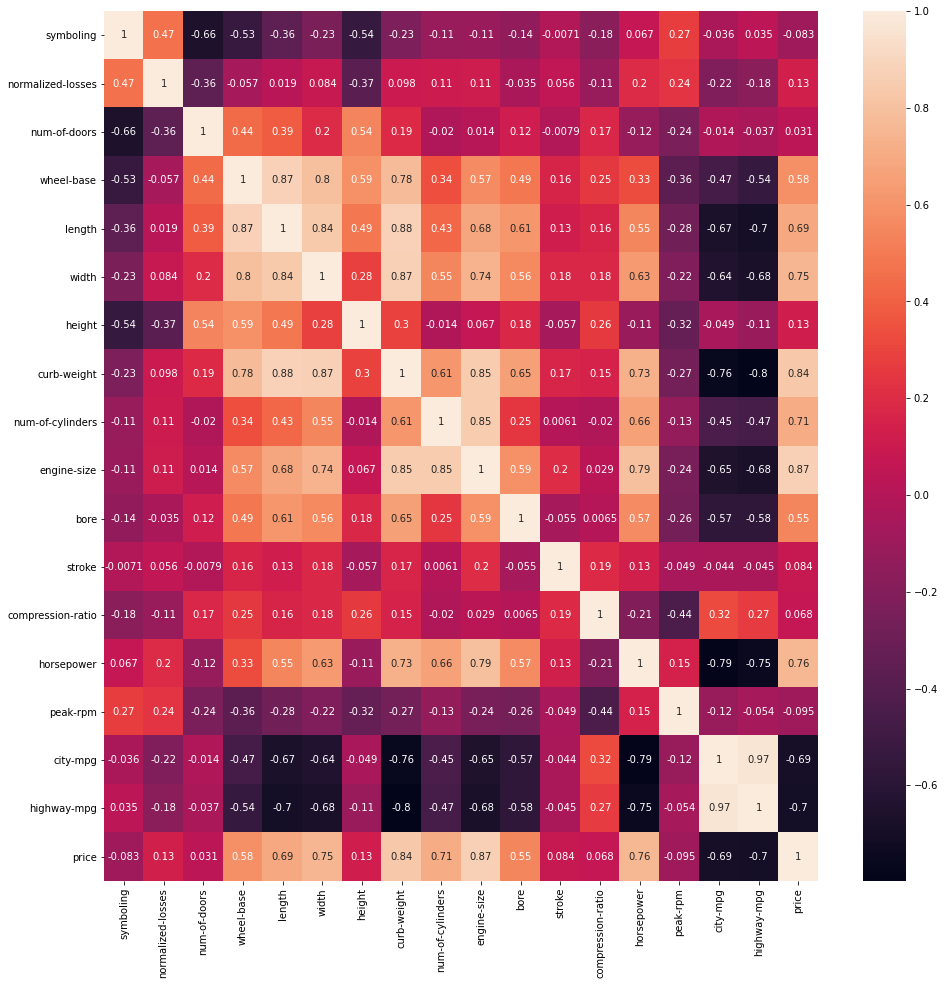

In [229]:
plt.figure(figsize = (16, 16))
sns.heatmap(data_set.corr(), annot = True)

In [230]:
data_set.drop(['symboling','stroke','compression-ratio','peak-rpm','num-of-doors'], axis = 1, inplace = True)

In [231]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  205 non-null    float64
 1   make               205 non-null    object 
 2   fuel-type          205 non-null    object 
 3   aspiration         205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   wheel-base         205 non-null    float64
 8   length             205 non-null    float64
 9   width              205 non-null    float64
 10  height             205 non-null    float64
 11  curb-weight        205 non-null    int64  
 12  engine-type        205 non-null    object 
 13  num-of-cylinders   205 non-null    int64  
 14  engine-size        205 non-null    int64  
 15  fuel-system        205 non-null    object 
 16  bore               205 non

In [232]:
data_set['make'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [233]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data_set['make'] = 1 + encoder.fit_transform(data_set['make'])

In [234]:
data_set = pd.get_dummies(data_set, drop_first = True)

In [235]:
data_set

,normalized-losses,make,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,...,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,122.0,1,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,0,1,0,0
1,122.0,1,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,0,1,0,0
2,122.0,1,94.5,171.2,65.5,52.4,2823,6,152,2.68,...,0,1,0,0,0,0,0,1,0,0
3,164.0,2,99.8,176.6,66.2,54.3,2337,4,109,3.19,...,0,0,0,0,0,0,0,1,0,0
4,164.0,2,99.4,176.6,66.4,54.3,2824,5,136,3.19,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,95.0,22,109.1,188.8,68.9,55.5,2952,4,141,3.78,...,0,0,0,0,0,0,0,1,0,0
201,95.0,22,109.1,188.8,68.8,55.5,3049,4,141,3.78,...,0,0,0,0,0,0,0,1,0,0
202,95.0,22,109.1,188.8,68.9,55.5,3012,6,173,3.58,...,0,1,0,0,0,0,0,1,0,0
203,95.0,22,109.1,188.8,68.9,55.5,3217,6,145,3.01,...,0,0,0,0,0,1,0,0,0,0


# 4.Preparing Data for Traning and Testing ML models

In [236]:
from sklearn.model_selection import train_test_split

X = data_set.drop('price', axis = 1)
y = data_set['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

# 5.Fitting Machine Learning Models on Dataset

In [237]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()

model1.fit(X_train, y_train)

pred1 = model1.predict(X_test)

In [238]:
from sklearn.metrics import r2_score
r2_score(y_test, pred1)

0.8580792838597124

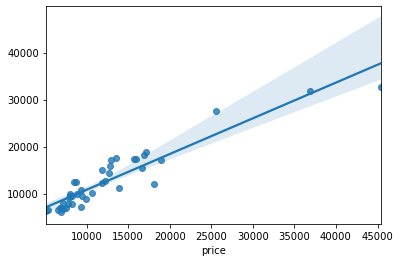

In [239]:
sns.regplot(x = y_test, y = pred1)

In [240]:
from sklearn.tree import DecisionTreeRegressor

model2 = DecisionTreeRegressor()

model2.fit(X_train, y_train) 

pred2 = model2.predict(X_test)

In [241]:
r2_score(y_test, pred2)

0.8448039780446988

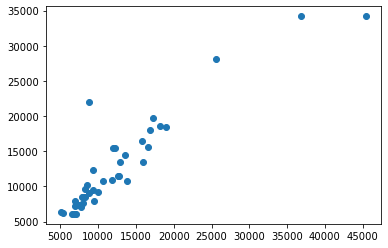

In [242]:
plt.scatter(x = y_test, y = pred2)

In [243]:
from sklearn.svm import SVR

model3 = SVR()

model3.fit(X_train,y_train)

pred3=model3.predict(X_test)

In [244]:
r2_score(y_test, pred3)

-0.0627596342220369

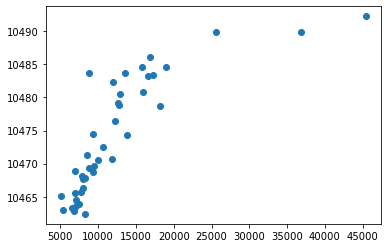

In [245]:
plt.scatter(x = y_test, y = pred3)

In [246]:
from sklearn.ensemble import GradientBoostingRegressor
model4 = GradientBoostingRegressor()

model4.fit(X_train,y_train)

pred4 = model4.predict(X_test)

In [247]:
r2_score(y_test, pred4)

0.926572631209486

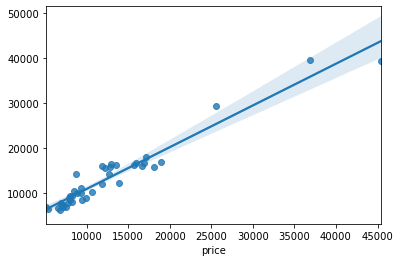

In [248]:
sns.regplot(x = y_test, y = pred4)

In [249]:
from sklearn.ensemble import RandomForestRegressor

model5 = RandomForestRegressor()

model5.fit(X_train, y_train) 

pred5 = model5.predict(X_test)

In [250]:
r2_score(y_test, pred5)

0.9157940763436709

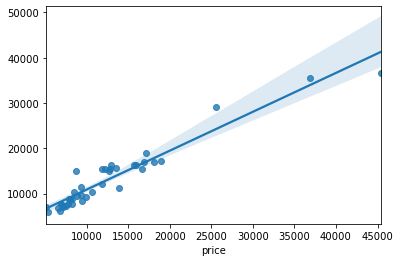

In [251]:
sns.regplot(x = y_test, y = pred5)

In [252]:
#conclusion
y_test

183     7975.0
133    12170.0
33      6529.0
80      9959.0
192    13845.0
185     8195.0
124    12764.0
60      8495.0
56     11845.0
174    10698.0
76      5389.0
52      6795.0
199    18950.0
101    13499.0
82     12629.0
67     25552.0
130     9295.0
187     9495.0
90      7099.0
112    16900.0
74     45400.0
165     9298.0
138     5118.0
34      7129.0
115    16630.0
39      8845.0
155     8778.0
194    12940.0
107    11900.0
160     7738.0
23      7957.0
136    18150.0
153     6918.0
96      7499.0
44      8206.0
181    15750.0
104    17199.0
17     36880.0
37      7895.0
156     6938.0
196    15985.0
Name: price, dtype: float64

In [253]:
pred5

array([ 8845.77      , 15450.81333333,  6884.42      ,  9219.97      ,
       11263.36      ,  8840.01      , 15388.755     , 10379.06      ,
       12047.5       , 10355.91      ,  6013.44      ,  6184.475     ,
       17201.825     , 15588.99      , 14892.675     , 29102.41      ,
       11549.16666667,  8384.68      ,  7206.64833333, 16882.07      ,
       36685.975     ,  9723.83      ,  7045.41833333,  6943.32      ,
       15447.95      ,  9491.61      , 14873.08      , 16263.72      ,
       15314.69      ,  7697.        ,  8607.0975    , 16893.375     ,
        7661.47      ,  7149.45      ,  7730.51166667, 16273.77      ,
       18887.84      , 35588.93      ,  8820.19      ,  7691.29      ,
       16381.        ])

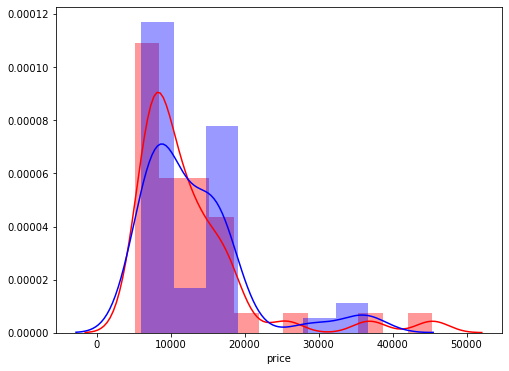

In [259]:
plt.figure(figsize=(8, 6))

axis1 = sns.distplot(y_test, color = 'r', label = 'Actual price')
sns.distplot(pred5, color = 'b', label = 'Predicted price' , ax = axis1)